In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


In [2]:
y, sr = librosa.load('train/rehan_00.wav')

In [6]:
mfcc = librosa.feature.mfcc(y=y,sr=sr,n_mfcc=12)
mfcc

array([[-529.9774   , -529.9774   , -529.9774   , ..., -269.174    ,
        -256.6631   , -229.675    ],
       [   0.       ,    0.       ,    0.       , ...,  150.86978  ,
         139.47795  ,  127.19443  ],
       [   0.       ,    0.       ,    0.       , ...,   10.607844 ,
           9.948969 ,   23.677994 ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,   -3.7607746,
          -4.6167755,   -6.1802893],
       [   0.       ,    0.       ,    0.       , ...,  -29.824917 ,
         -28.734976 ,  -19.647005 ],
       [   0.       ,    0.       ,    0.       , ...,  -13.020737 ,
         -14.005086 ,  -14.219048 ]], dtype=float32)

In [7]:
to_append = ''
for e in mfcc:
    to_append += f' {np.mean(e)}'
to_append.split()

['-386.3880920410156',
 '76.16161346435547',
 '1.2438093423843384',
 '14.223637580871582',
 '7.6469831466674805',
 '7.0362749099731445',
 '-19.389991760253906',
 '-11.652234077453613',
 '-13.720266342163086',
 '-8.418910026550293',
 '-12.65011215209961',
 '-5.473606109619141']

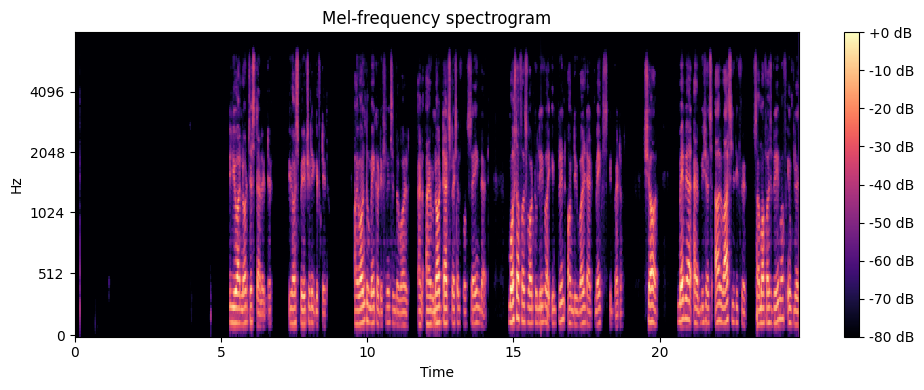

In [3]:
# Compute Mel-scaled spectrogram with librosa
S = librosa.feature.melspectrogram(y=y, sr=sr)

# Convert to decibels
S_dB = librosa.power_to_db(S, ref=np.max)

# Visualize the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [13]:
np.savetxt('mel.csv',S,delimiter=',')

In [17]:
mel = np.mean(S,axis=1)
len(mel)

128

In [13]:
np.savetxt('mfcc_fea.csv',mfcc,delimiter=',')